In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.cm as cm
from tensorflow.keras.applications import Xception
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.random.seed(12049)


In [3]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {classes[k]}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

In [4]:
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']
base_dir = "/kaggle/input/knee-dataset2/data_set"
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')
train_data = get_classes(train_path, class_names, 'Train')
valid_data = get_classes(valid_path, class_names, 'Valid')
tests_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade 0 - Healthy: 507 images, 21.9%
Grade 1 - Doubtful: 526 images, 22.72%
Grade 2 - Minimal: 527 images, 22.76%
Grade 3 - Moderate: 582 images, 25.14%
Grade 4 - Severe: 173 images, 7.47%
---- Valid ----
Grade 0 - Healthy: 208 images, 18.71%
Grade 1 - Doubtful: 251 images, 22.57%
Grade 2 - Minimal: 232 images, 20.86%
Grade 3 - Moderate: 329 images, 29.59%
Grade 4 - Severe: 92 images, 8.27%
---- Test ----
Grade 0 - Healthy: 639 images, 36.77%
Grade 1 - Doubtful: 296 images, 17.03%
Grade 2 - Minimal: 447 images, 25.72%
Grade 3 - Moderate: 223 images, 12.83%
Grade 4 - Severe: 133 images, 7.65%


Train data - Healthy


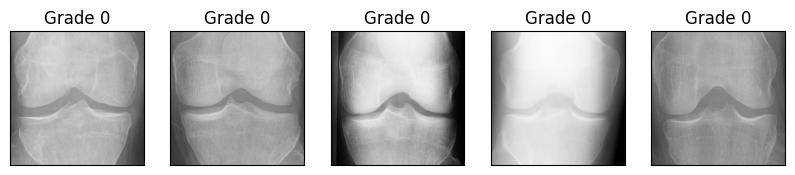

Train data - Doubtful


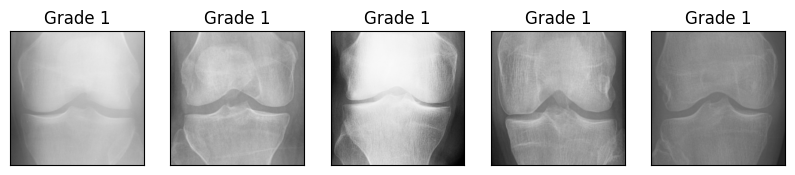

Train data - Minimal


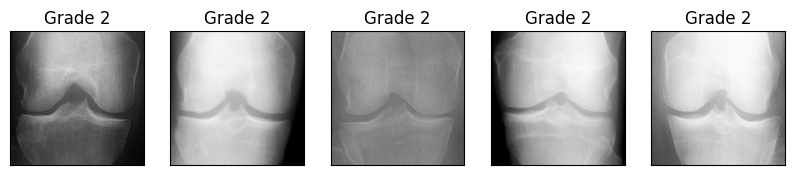

Train data - Moderate


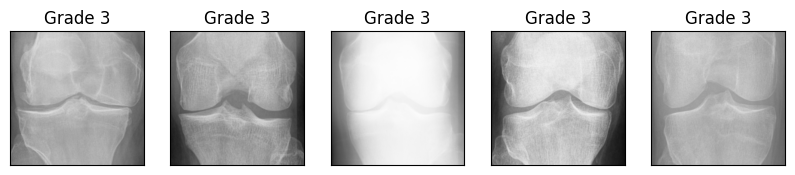

Train data - Severe


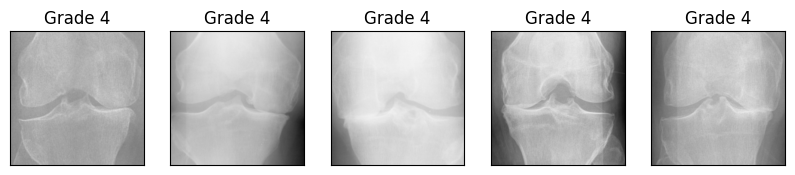

In [5]:
plot_classes(train_data, train_path, class_names, 'Train data')

Valid data - Healthy


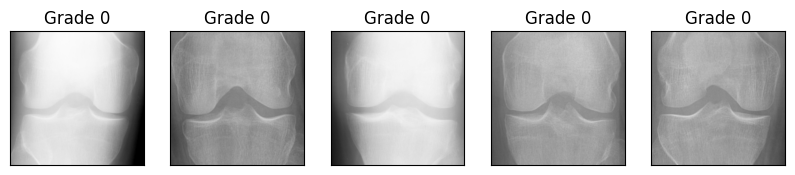

Valid data - Doubtful


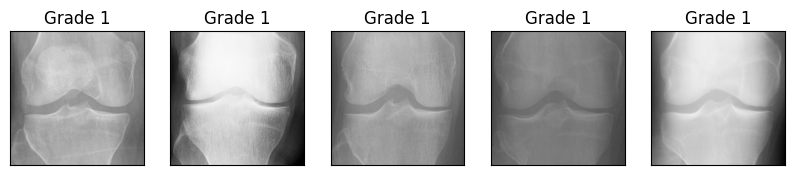

Valid data - Minimal


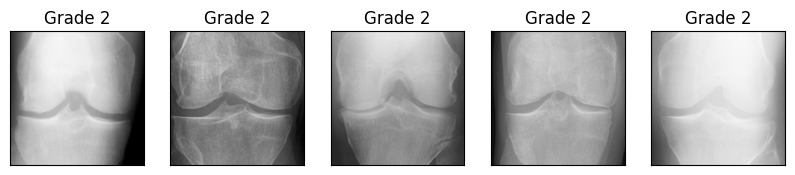

Valid data - Moderate


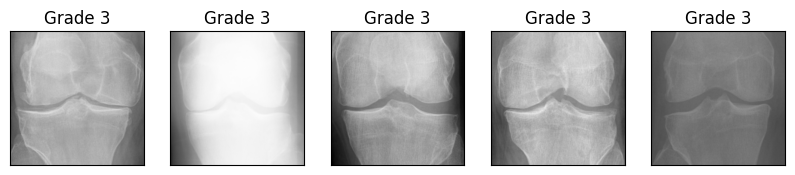

Valid data - Severe


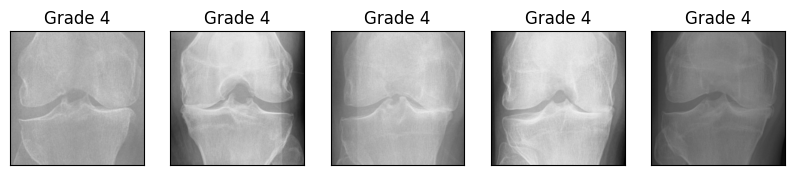

In [6]:
plot_classes(valid_data, valid_path, class_names, 'Valid data')

Test data - Healthy


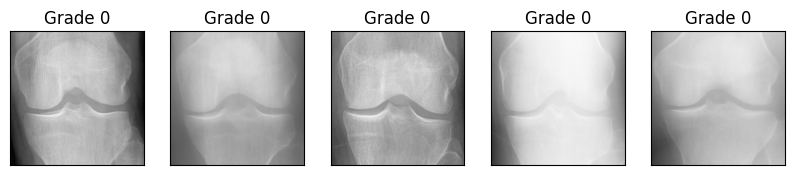

Test data - Doubtful


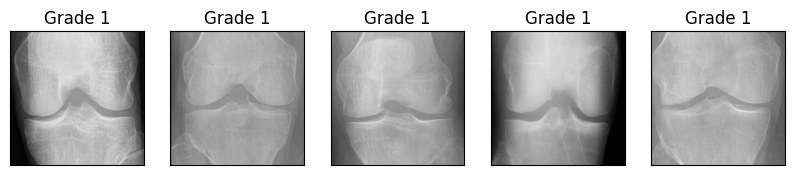

Test data - Minimal


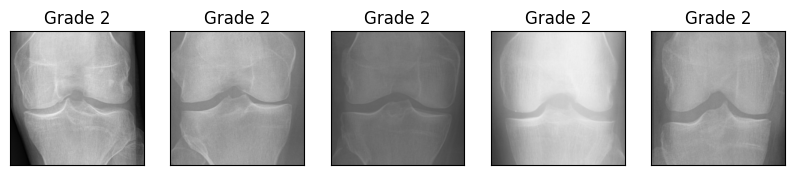

Test data - Moderate


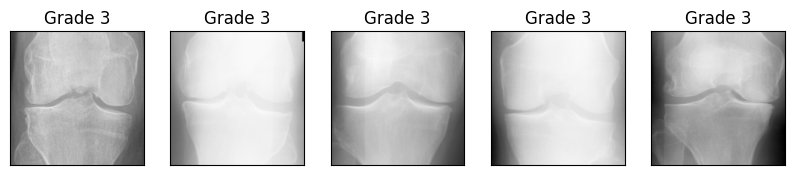

Test data - Severe


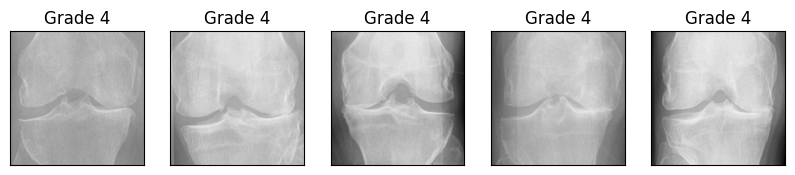

In [7]:
plot_classes(tests_data, test_path, class_names, 'Test data')

Found 2315 images belonging to 5 classes.


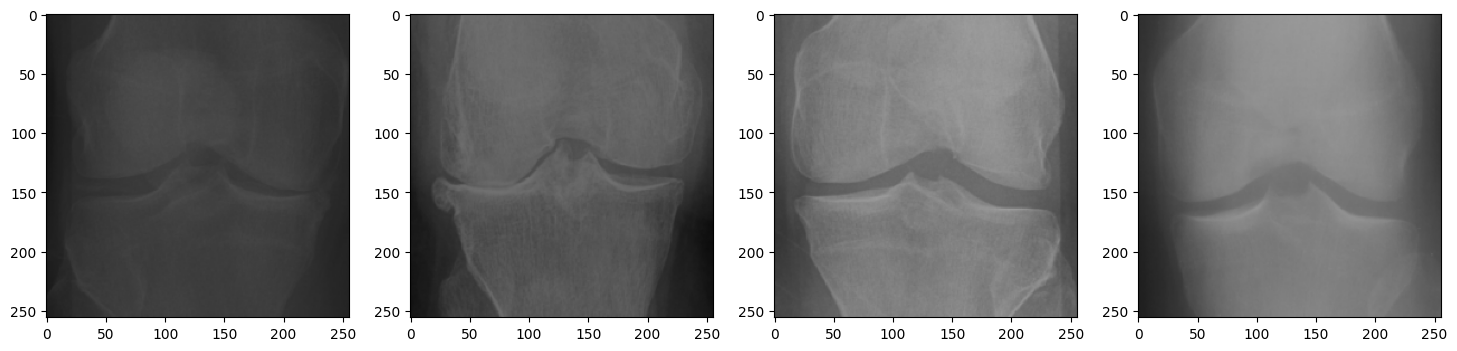

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.3, 0.8]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18, 18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

Found 2315 images belonging to 5 classes.


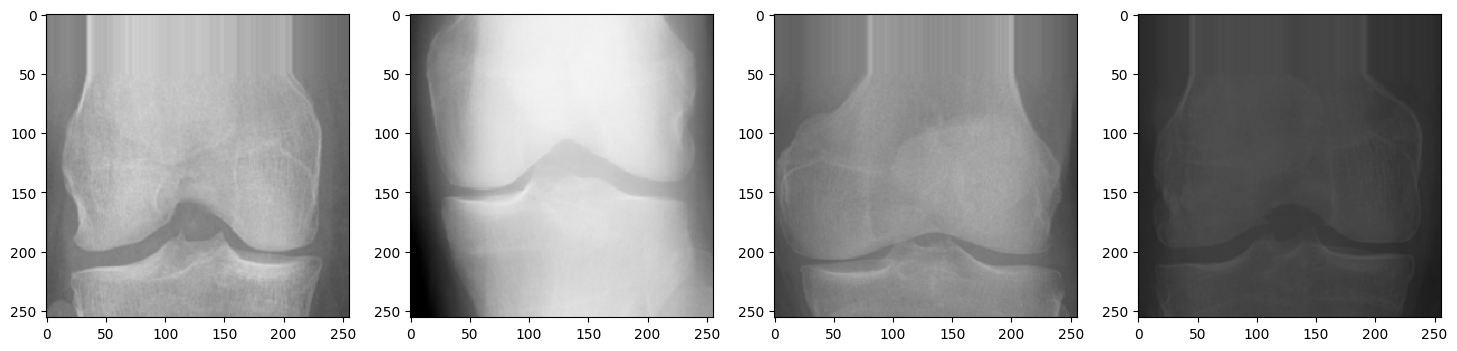

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-50,0,50,30,-30]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=5)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

Found 2315 images belonging to 5 classes.


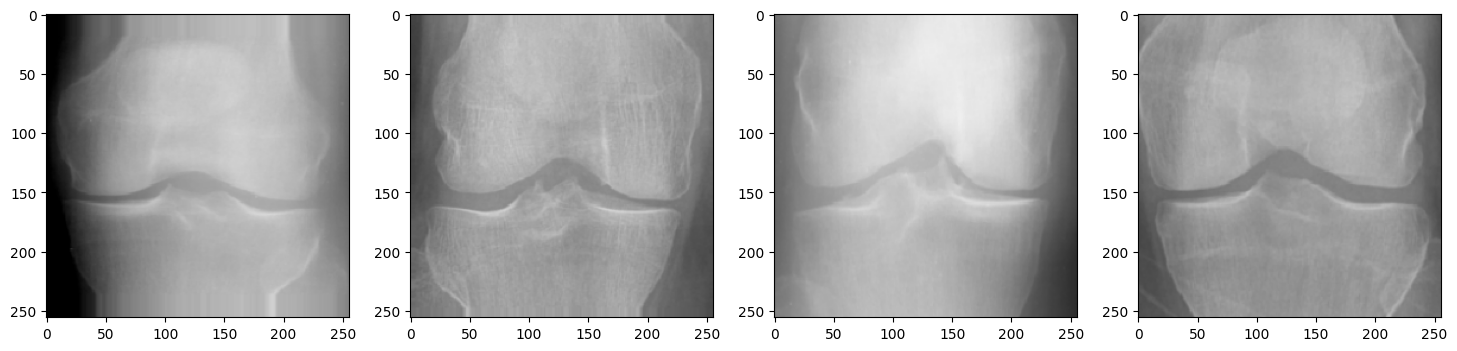

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

Found 2315 images belonging to 5 classes.


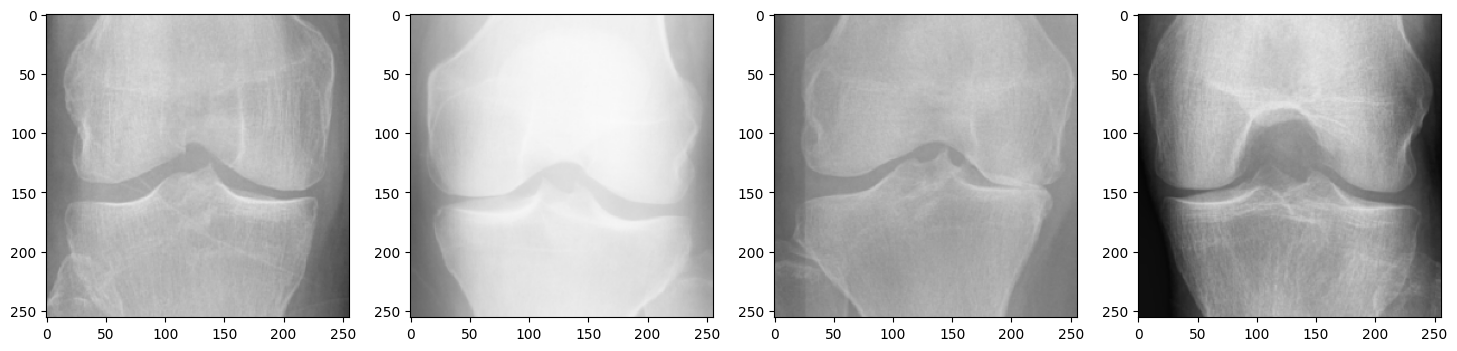

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

In [12]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
)
target_size = (224, 224)

train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 2315 images belonging to 5 classes.
Found 1112 images belonging to 5 classes.


In [13]:
y_train = train_generator.labels
#print(y_train)
y_val = valid_generator.labels

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train --->  {0: 507, 1: 526, 2: 527, 3: 582, 4: 173}
{0: 0.9132149901380671, 1: 0.8802281368821293, 2: 0.8785578747628083, 3: 0.7955326460481099, 4: 2.6763005780346822}


In [15]:
np.random.seed(12049)
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model


def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))


In [16]:
# base_dir = "/kaggle/input/knee-osteoarthritis-dataset-with-severity"
# train_path = os.path.join(base_dir, 'train')
# valid_path = os.path.join(base_dir, 'val')
# test_path = os.path.join(base_dir, 'test')


In [17]:
model_name = "Xception"
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

target_size = (224, 224)
epochs = 45
batch_size = 128
img_shape = (224, 224, 3)

# Save model
#save_model_ft2 = os.path.join('models', f'model_{model_name}2_ft.keras')
#save_model_ft = os.path.join('models', f'model_{model_name}_ft.keras')
# high_acc=tf.keras.callbacks.ModelCheckpoint(
#     save_model_ft2,
#     monitor= 'accuracy'
    
# )

In [18]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
)
train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 2315 images belonging to 5 classes.
Found 1112 images belonging to 5 classes.


In [19]:
classes = np.unique(y_train)

# Callbacks
early = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.01, patience=40,
            restore_best_weights=True
        )
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01, 
                min_lr=1e-10, patience=2, mode='auto'
            )
model =tf.keras.applications.xception.Xception(
    input_shape=(img_shape),
    include_top=False,
    weights="imagenet",
)

83683744/83683744 [==============================] - 3s 0us/step


In [20]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 20871725 (79.62 MB)
Trainable params: 20817197 (79.41 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [21]:
import timeit
model_ft.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [22]:
import keras as ke

In [23]:
# checkpoint = ke.callbacks.ModelCheckpoint("best_model1.hdf5", monitor='loss', verbose=1,save_best_only=True,save_weights_only=True, mode='auto',period=1)
# save_model_ft= os.path.join('models', f'model_{model_name}_ft.keras')
# checkpoint2 = ke.callbacks.ModelCheckpoint('save_model_ft', monitor='val_accuracy', verbose=1,save_best_only=True,save_weights_only=True, mode='auto', period=1)

In [24]:
# checkpoint = ke.callbacks.ModelCheckpoint("best_model1.hdf5", monitor='loss',verbose=1,save_best_only=True,save_weights_only=True, mode='auto',period=1)
save_model_ft= os.path.join('models',f'model_{model_name}_ft.h5')
checkpoint2 = ke.callbacks.ModelCheckpoint('save_model_ft', monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True, mode='auto',period=1)

In [25]:
# import timeit
# model_ft.compile(
#     optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
# )

start_ft = timeit.default_timer()

history = model_ft.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[plateau,checkpoint2],
    validation_data=valid_generator,
    class_weight=train_class_weights,
    verbose=1, 
)

stop_ft = timeit.default_timer()


Epoch 1/45
73/73 [==============================] - ETA: 0s - loss: 1.2536 - accuracy: 0.3952
Epoch 1: val_accuracy improved from -inf to 0.27068, saving model to save_model_ft
73/73 [==============================] - 83s 655ms/step - loss: 1.2536 - accuracy: 0.3952 - val_loss: 2.9112 - val_accuracy: 0.2707 - lr: 0.0010
Epoch 2/45
73/73 [==============================] - ETA: 0s - loss: 0.9454 - accuracy: 0.5330
Epoch 2: val_accuracy improved from 0.27068 to 0.29406, saving model to save_model_ft
73/73 [==============================] - 35s 478ms/step - loss: 0.9454 - accuracy: 0.5330 - val_loss: 8.4188 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 3/45
73/73 [==============================] - ETA: 0s - loss: 0.9139 - accuracy: 0.5490
Epoch 3: val_accuracy improved from 0.29406 to 0.48831, saving model to save_model_ft
73/73 [==============================] - 35s 478ms/step - loss: 0.9139 - accuracy: 0.5490 - val_loss: 2.2274 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 4/45
73/73 [==========

In [26]:
execution_time_ft = (stop_ft - start_ft) / 60
print(
    f"Model {model_name} fine tuning executed in {execution_time_ft:.2f} minutes"
)

Model Xception fine tuning executed in 26.64 minutes


In [27]:
model_ft.save(save_model_ft)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


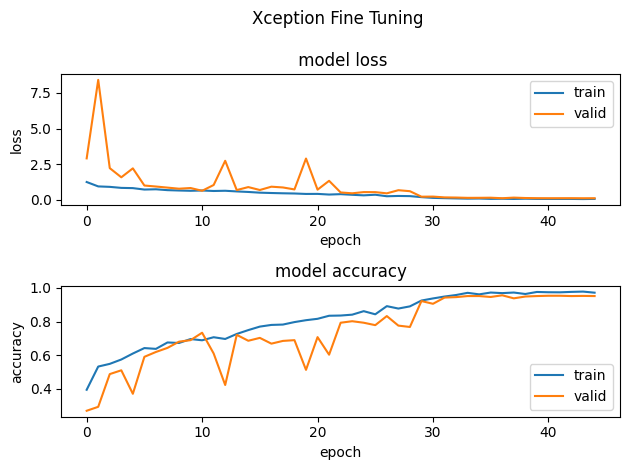

In [28]:
get_plot_loss_acc(model_ft, f"{model_name} Fine Tuning")

In [29]:
get_evaluate(valid_generator, "Valid", model_ft)

35/35 [==============================] - 3s 84ms/step - loss: 0.1164 - accuracy: 0.9514
Valid loss: 0.12
Valid accuracy: 0.95


In [30]:
predict_model_ft = get_predict(valid_generator, model_ft)

get_metrics(
    valid_generator.labels,
    y_pred=np.argmax(predict_model_ft, axis=1),
    model_name=model_name,
)

35/35 [==============================] - 4s 78ms/step
Accuracy Score - Xception: 0.95
Balanced Accuracy Score - Xception: 0.96


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       208
           1       0.96      0.95      0.95       251
           2       0.96      0.91      0.93       232
           3       0.94      0.97      0.95       329
           4       0.90      1.00      0.95        92

    accuracy                           0.95      1112
   macro avg       0.95      0.96      0.95      1112
weighted avg       0.95      0.95      0.95      1112



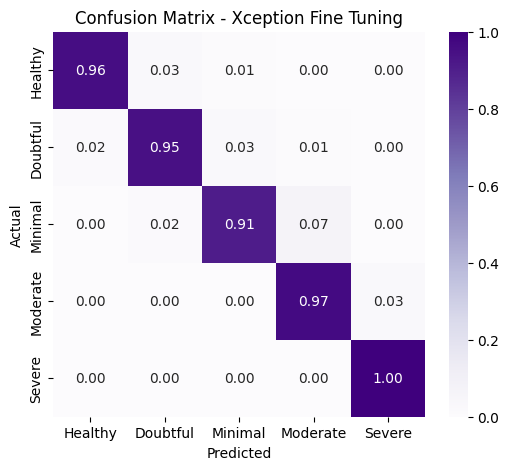

In [31]:
compute_confusion_matrix(
    valid_generator, predict_model_ft, class_names, f"{model_name} Fine Tuning"
)